In [ ]:
from google.colab import files

uploaded = files.upload()

Saving predict+students+dropout+and+academic+success+cleaned.csv to predict+students+dropout+and+academic+success+cleaned.csv


In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
students_csv = 'predict+students+dropout+and+academic+success+cleaned.csv'
students_df = pd.read_csv(students_csv)

In [ ]:
print(students_df.shape)

(4424, 35)


In [ ]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Previous qualification                          4424 non-null   int64  
 5   Previous qualification (grade)                  4424 non-null   float64
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
students_df['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [ ]:
target_mapper = {"Graduate":0,
              "Dropout":1,
              "Enrolled":2}

In [ ]:
students_df['Target-Numeric'] = students_df["Target"].replace(target_mapper)

In [ ]:
students_df['Target'] = students_df['Target-Numeric']
students_df.drop('Target-Numeric', axis=1, inplace=True)

In [ ]:
students_df.head(10)

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,122.0,1,19,12,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,160.0,1,1,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,122.0,1,37,37,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,122.0,1,38,37,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,1,100.0,1,37,38,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
5,2,39,1,9991,19,133.1,1,37,37,9,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,0
6,1,1,1,9500,1,142.0,1,19,38,7,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,0
7,1,18,4,9254,1,119.0,1,37,37,9,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,1
8,1,1,3,9238,1,137.0,62,1,1,9,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,0
9,1,1,1,9238,1,138.0,1,1,19,4,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,1


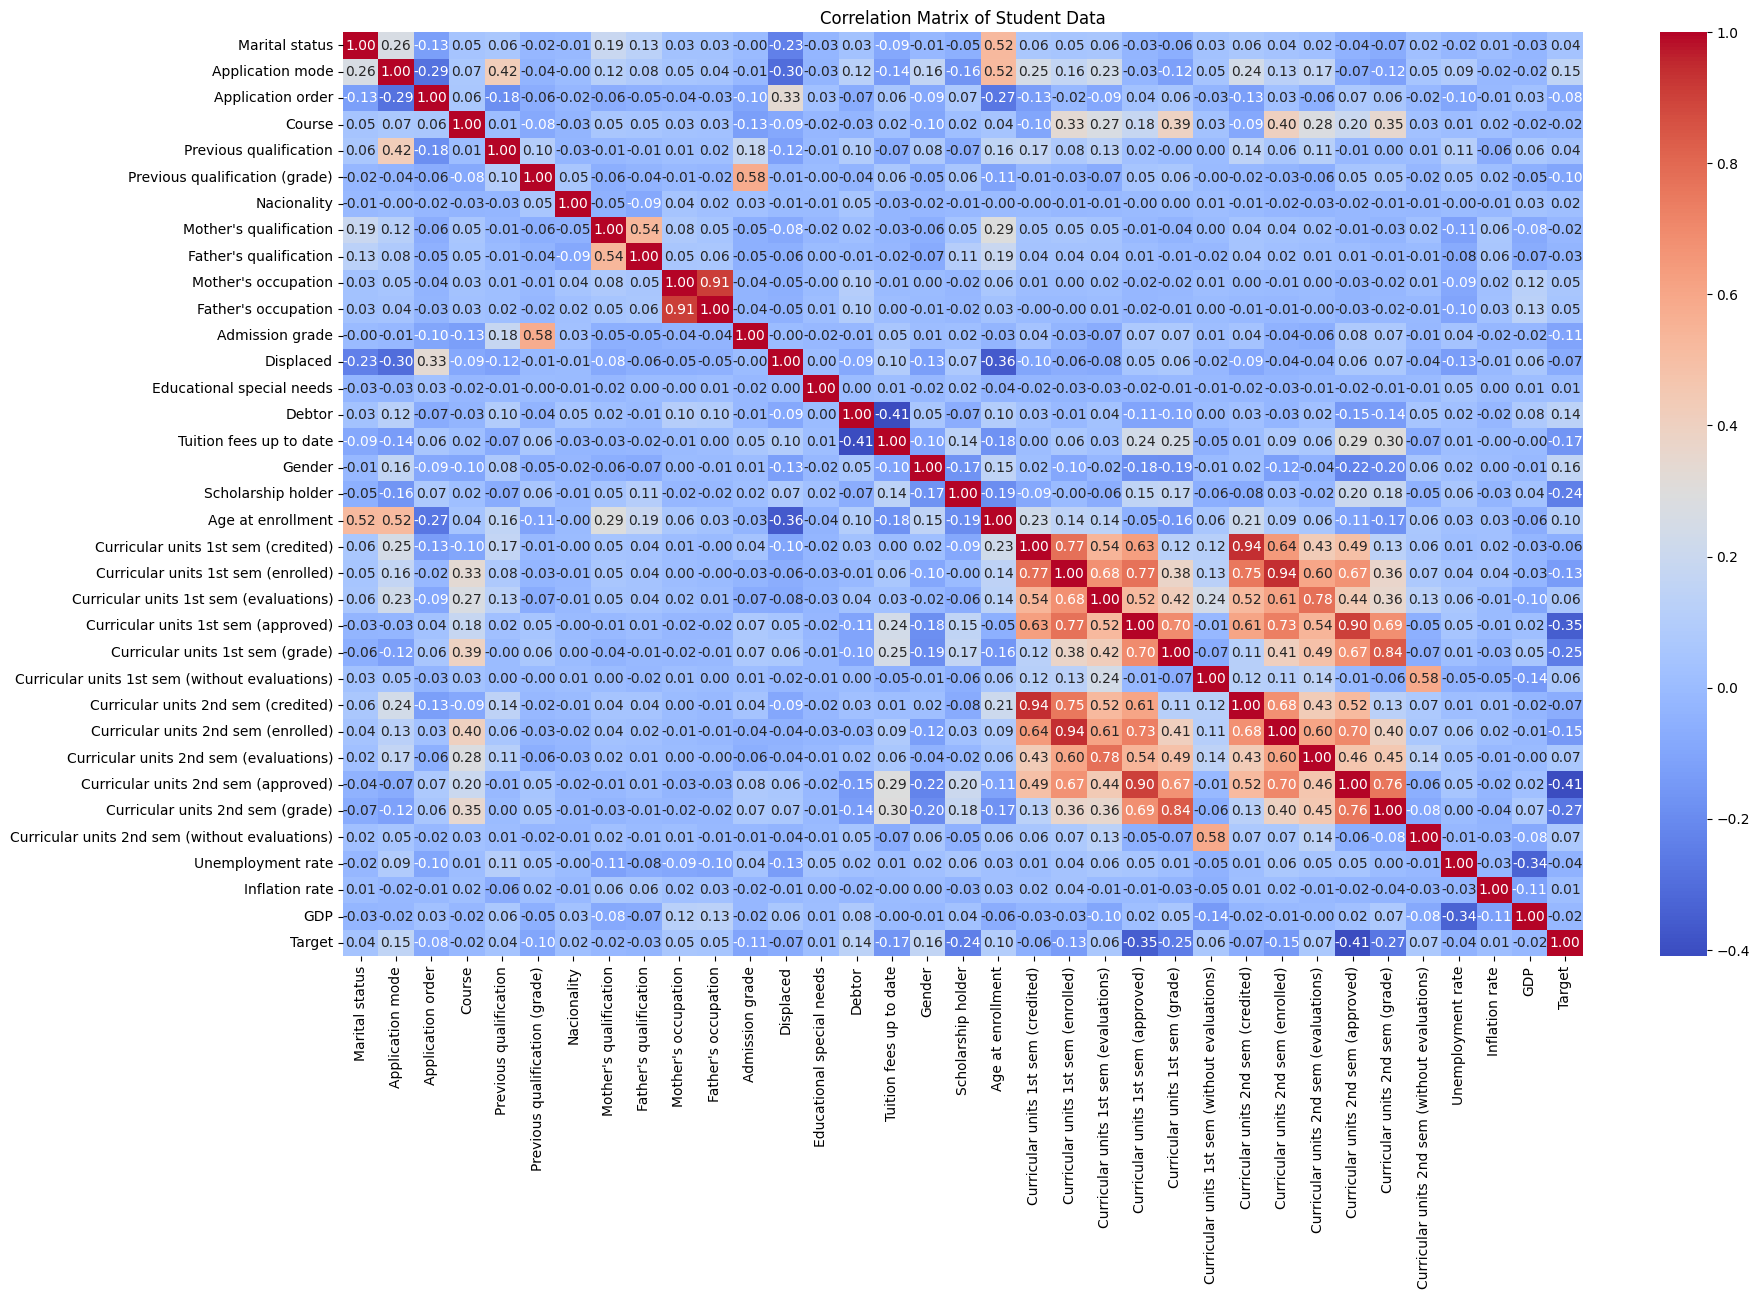

In [ ]:
# Calculating the correlation matrix
corr_matrix = students_df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Student Data')
plt.show()

## **Neural Network model with Simple Dense Layers**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% (for further splitting into validation and test)
train_data, remaining_data = train_test_split(students_df, test_size=0.2, random_state=42)

# Splitting the remaining 20% equally into validation and test sets
validation_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

In [ ]:
train_data.head(10)
train_data.shape

(3539, 35)

In [ ]:
validation_data.head(10)
validation_data.shape

(442, 35)

In [ ]:
test_data.head(10)
test_data.shape

(443, 35)

In [ ]:
# Separating the features and target variable
X_train = train_data.drop('Target', axis=1)
y_train = train_data['Target']
X_val = validation_data.drop('Target', axis=1)
y_val = validation_data['Target']
X_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']


In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)


In [ ]:
# 2. Creating the Model
model = Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 units for 3 classes
])


In [ ]:
# 3. Compiling the Model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',  # Suitable for integer targets
              metrics=['accuracy'])

In [ ]:
# 4. Training the Model
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=30, batch_size=32)


Epoch 1/30
111/111 [==============================] - 1s 5ms/step - loss: 0.9969 - accuracy: 0.5581 - val_loss: 0.8945 - val_accuracy: 0.6538
Epoch 2/30
111/111 [==============================] - 0s 3ms/step - loss: 0.8144 - accuracy: 0.6804 - val_loss: 0.7628 - val_accuracy: 0.6991
Epoch 3/30
111/111 [==============================] - 0s 3ms/step - loss: 0.7281 - accuracy: 0.7084 - val_loss: 0.6968 - val_accuracy: 0.7308
Epoch 4/30
111/111 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.7310 - val_loss: 0.6649 - val_accuracy: 0.7398
Epoch 5/30
111/111 [==============================] - 0s 3ms/step - loss: 0.6460 - accuracy: 0.7420 - val_loss: 0.6394 - val_accuracy: 0.7466
Epoch 6/30
111/111 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.7480 - val_loss: 0.6244 - val_accuracy: 0.7466
Epoch 7/30
111/111 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.7522 - val_loss: 0.6220 - val_accuracy: 0.7489
Epoch 

In [ ]:
# Extracting the history of training and validation loss and accuracy
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

In [ ]:
epochs = range(1, len(training_loss) + 1)

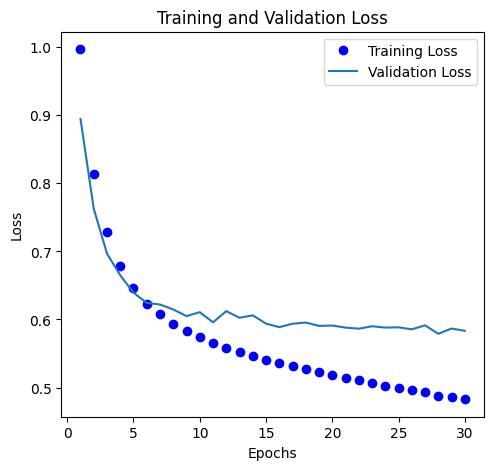

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

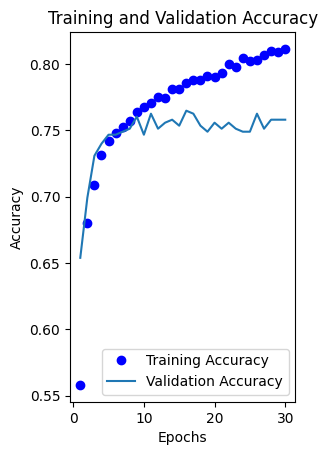

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Evaluating the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)

# Printing the accuracy
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


14/14 [==============================] - 0s 7ms/step - loss: 0.5833 - accuracy: 0.7579
Validation Accuracy: 75.79%


In [ ]:
y_test_pred = model.predict(X_test_scaled)

# Evaluating the model on the validation set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Printing the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

14/14 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.7494
Test Accuracy: 74.94%


## **Logistic Regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
students_df = students_df[students_df['Target'] != 2]

In [ ]:
students_df['Target'].value_counts()

0    2209
1    1421
Name: Target, dtype: int64

In [ ]:
students_df.head(10)

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,122.0,1,19,12,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,160.0,1,1,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,122.0,1,37,37,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,122.0,1,38,37,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,1,100.0,1,37,38,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
5,2,39,1,9991,19,133.1,1,37,37,9,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,0
6,1,1,1,9500,1,142.0,1,19,38,7,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,0
7,1,18,4,9254,1,119.0,1,37,37,9,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,1
8,1,1,3,9238,1,137.0,62,1,1,9,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,0
9,1,1,1,9238,1,138.0,1,1,19,4,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,1


In [ ]:
X = students_df
X = X.drop('Target', axis=1)
y = students_df['Target']

In [ ]:
X.shape

(3630, 34)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X = scaler.fit_transform(X)

In [ ]:
students_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evalua

In [ ]:
students_df['Age at enrollment'][0]

20

In [ ]:
features = ['Marital status','Course','Debtor','Nacionality',
                'Previous qualification (grade)',
                'Tuition fees up to date',
                'Scholarship holder',
                'Gender','Admission grade',
                'Age at enrollment',
                'Educational special needs',
                'Unemployment rate',
                'Curricular units 1st sem (credited)',
                'Curricular units 1st sem (enrolled)',
                'Curricular units 1st sem (evaluations)',
                'Curricular units 1st sem (approved)',
                'Curricular units 1st sem (grade)',
                'Curricular units 1st sem (without evaluations)',
                'Curricular units 2nd sem (credited)',
                'Curricular units 2nd sem (enrolled)',
                'Curricular units 2nd sem (evaluations)',
                'Curricular units 2nd sem (approved)',
                'Curricular units 2nd sem (grade)',
                'Curricular units 2nd sem (without evaluations)',
                'Inflation rate', 'GDP'
                ]


X = students_df[features]
X=pd.get_dummies(X, columns=['Course'], prefix='Course')
X=pd.get_dummies(X, columns=['Nacionality'], prefix='Nacionality')
X=pd.get_dummies(X, columns=['Marital status'], prefix='Marital status')

# scaler = MinMaxScaler()

# students_df['Age'] = scaler.fit_transform(students_df[['Age']])
y = students_df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)  # Increase the number of iterations as needed


# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9159779614325069
Confusion Matrix:
[[430  19]
 [ 42 235]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       449
           1       0.93      0.85      0.89       277

    accuracy                           0.92       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726



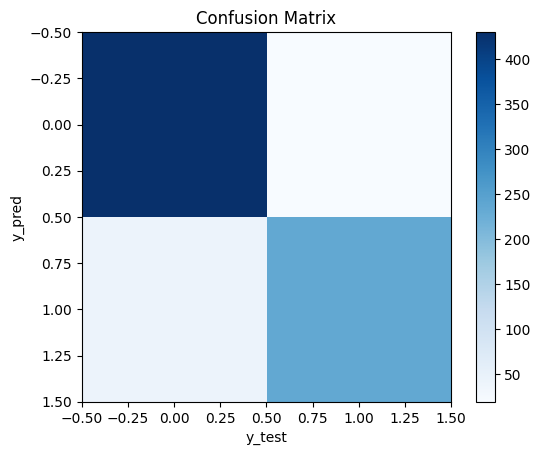

In [ ]:
plt.imshow(conf_matrix, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.colorbar()
plt.show()

In [ ]:

# Extract TP, FP, TN, FN from the confusion matrix
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]

# Print the values
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 235
False Positives (FP): 19
True Negatives (TN): 430
False Negatives (FN): 42


In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming test_labels are the true labels and y_pred is the predicted labels
test_labels = y_test
target_predicted = y_pred

# Calculate and print the Validation AUC
validation_auc = roc_auc_score(y_test, y_pred)
print("Validation AUC:", validation_auc)


Validation AUC: 0.9030295964558224


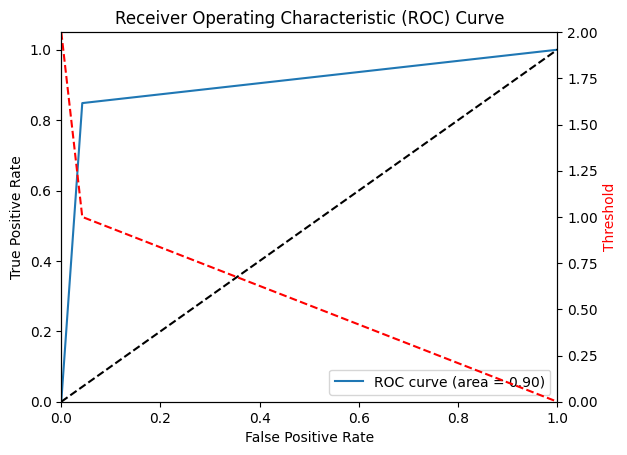

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming test_labels are the true labels and y_pred is the predicted labels
test_labels = y_test
target_predicted = y_pred

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, target_predicted, pos_label=1)
roc_auc = auc(fpr, tpr)
thresholds = np.nan_to_num(thresholds, nan=0, posinf=0, neginf=0)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r', linestyle='dashed', color='r')
ax2.set_ylabel('Threshold', color='r')
ax2.set_ylim([thresholds[-1], thresholds[0]])
ax2.set_xlim([fpr[0], fpr[-1]])

plt.show()